# UNEMPOLYMENT RATE ANALYSIS USING PYTHON

### OASIS INFOBYTE DATA SCIENCE INTERNSHIP

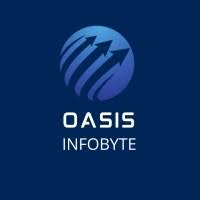

#### OBJECTIVE

The primary aim of this analysis is to assess the repercussions of the COVID-19 pandemic on India's job market. The dataset under consideration contains crucial information about the unemployment rates across various Indian states. The dataset encompasses key indicators such as Date, Region, Frequency, Estimated Unemployment Rate (%), Estimated Employed, and Estimated Labour Participation Rate (%),Area.

#### ABOUT DATASET

In [ ]:
###### This dataset contains the unemployment rate of all the states in India

Region = states in India
Date = date which the unemployment rate observed
Frequency = measuring frequency (Monthly)
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
Estimated Employed = percentage of people employed
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR



In [2]:
data = pd.read_csv("C:\\Users\\DIYANN\\Downloads\\Unemployment in India.csv")
data
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
data[' Date'] = pd.to_datetime(data[' Date'])
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaT,NaN,NaN,NaN,NaN,NaN
764,NaN,NaT,NaN,NaN,NaN,NaN,NaN
765,NaN,NaT,NaN,NaN,NaN,NaN,NaN
766,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [7]:
data.columns = data.columns.str.strip()

In [8]:
data['Frequency'] = data['Frequency'].astype('category')

In [9]:
data.dropna(inplace=True)
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [10]:
data.shape

(740, 7)

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 41.3+ KB


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
numerical_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [14]:
print(data[numerical_cols])

     Estimated Unemployment Rate (%)  Estimated Employed  \
0                          -0.759558            0.593216   
1                          -0.815559            0.563119   
2                          -0.750225            0.604050   
3                          -0.790359            0.628669   
4                          -0.617688            0.625090   
..                               ...                 ...   
749                        -0.395550            0.453659   
750                        -0.477685            0.445609   
751                         0.358600            0.259202   
752                         0.320332            0.251956   
753                        -0.179946            0.233154   

     Estimated Labour Participation Rate (%)  
0                                   0.075241  
1                                  -0.071570  
2                                   0.107318  
3                                   0.165303  
4                                   0.252896

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scalerminmax = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
scaler = MinMaxScaler()
data[scalerminmax] = scaler.fit_transform(data[scalerminmax])
print(data[scalerminmax])
     

     Estimated Unemployment Rate (%)  Estimated Employed  \
0                           0.047563            0.261321   
1                           0.039745            0.256002   
2                           0.048866            0.263236   
3                           0.043263            0.267588   
4                           0.067370            0.266955   
..                               ...                 ...   
749                         0.098384            0.236654   
750                         0.086917            0.235231   
751                         0.203675            0.202284   
752                         0.198332            0.201003   
753                         0.128486            0.197680   

     Estimated Labour Participation Rate (%)  
0                                   0.504895  
1                                   0.484808  
2                                   0.509284  
3                                   0.517218  
4                                   0.529203

In [17]:
summary_=data.describe()
print(summary_)

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000          740.000000   
mean                          0.153609            0.156469   
std                           0.139709            0.176871   
min                           0.000000            0.000000   
25%                           0.060692            0.024952   
50%                           0.108809            0.102667   
75%                           0.207030            0.245496   
max                           1.000000            1.000000   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                  0.494600  
std                                   0.136919  
min                                   0.000000  
25%                                   0.417497  
50%                                   0.469784  
75%                                   0.543130  
max                                   1.000000  


In [18]:
region = data[data['Region'] == 'Bihar']
region
region.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,28.000000,28.000000,28.000000
mean,0.246524,0.269348,0.419040
std,0.164647,0.217104,0.021646
min,0.115585,0.029556,0.364787
25%,0.157024,0.065499,0.404414
50%,0.195596,0.188072,0.423278
75%,0.261142,0.501410,0.434251
max,0.765833,0.530810,0.455436


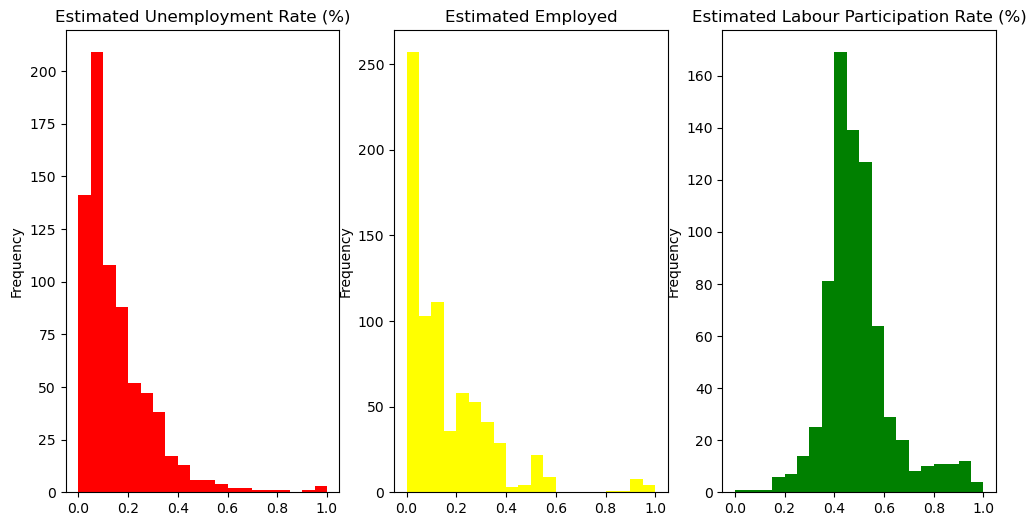

In [19]:
columns_ = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

hist_colors = ['red', 'yellow', 'green']
fig, axes = plt.subplots(1, len(columns_), figsize=(12, 6))
for i, column in enumerate(columns_):
    data[column].plot.hist(bins=20, color=hist_colors[i], ax=axes[i])
    axes[i].set_title(column)

plt.show()

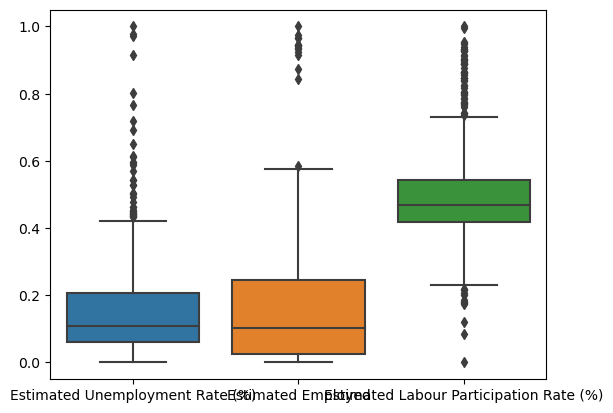

In [20]:
import seaborn as sns

sns.boxplot(data=data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
plt.show()


C:\Users\DIYANN\AppData\Local\Temp\ipykernel_5720\2622369421.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


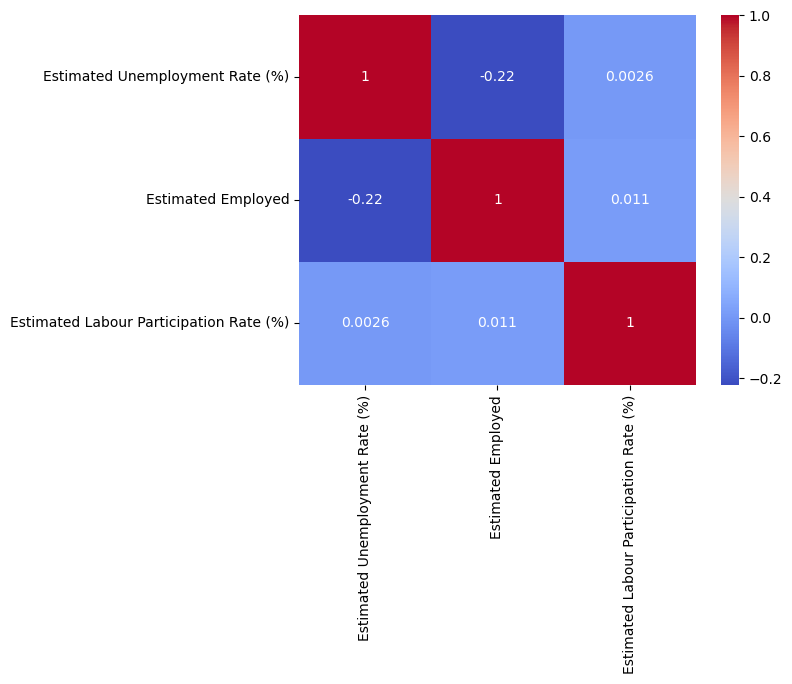

In [21]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


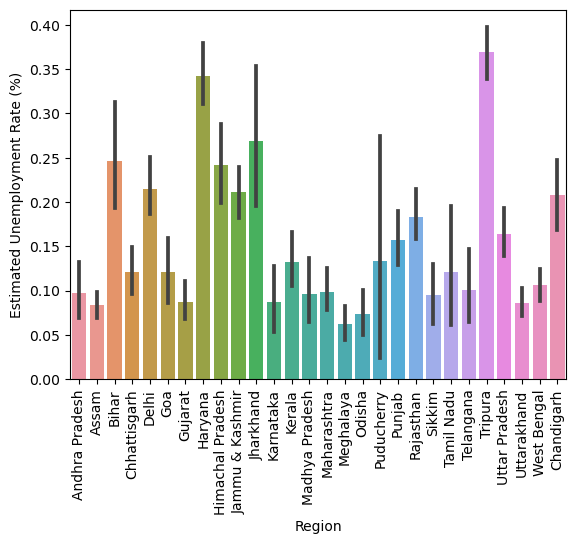

In [22]:
# Create the barplot
sns.barplot(data=data, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


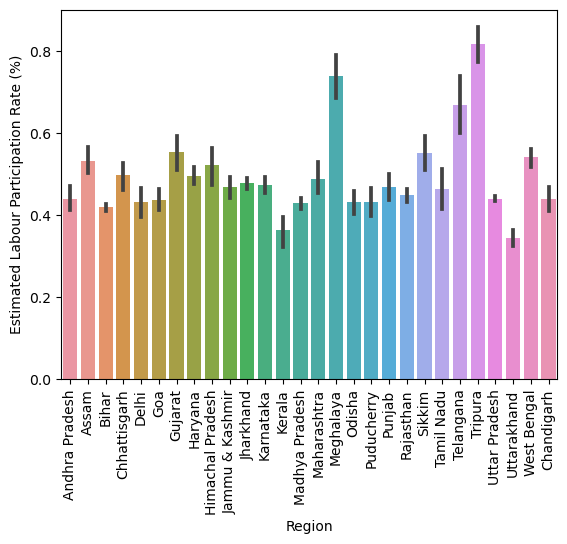

In [23]:
# Create a bar plot
sns.barplot(data=data, x='Region', y='Estimated Labour Participation Rate (%)')
plt.xticks(rotation=90)
plt.show()

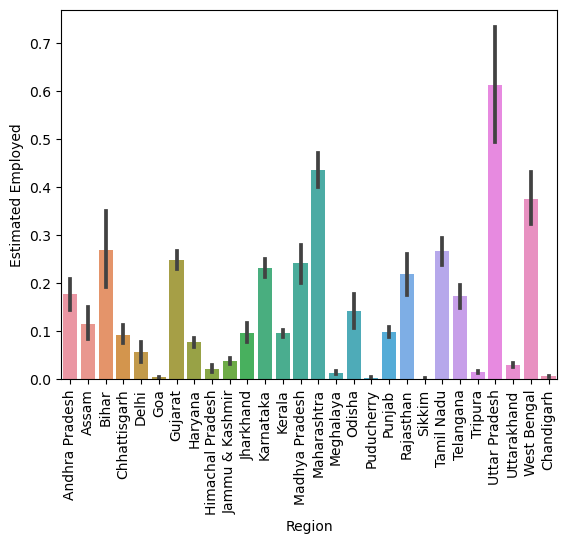

In [26]:
# Create a bar plot
sns.barplot(data=data, x='Region', y='Estimated Employed')
plt.xticks(rotation=90)
plt.show()

In [23]:
category_mapping = {'rural': 0, 'urban': 1}

data['Area'] = data['Area'].replace(category_mapping)


In [24]:
# Group the data by the 'Region' column
grouped_data = data.groupby('Region')

# Calculate summary statistics for each group
summary_stats_by_region = grouped_data.describe()

print(summary_stats_by_region)


                 Estimated Unemployment Rate (%)                      \
                                           count      mean       std   
Region                                                                 
Andhra Pradesh                              28.0  0.097435  0.089289   
Assam                                       26.0  0.083764  0.039200   
Bihar                                       28.0  0.246524  0.164647   
Chandigarh                                  12.0  0.208388  0.071778   
Chhattisgarh                                28.0  0.120411  0.075714   
Delhi                                       28.0  0.214951  0.088457   
Goa                                         24.0  0.120852  0.091689   
Gujarat                                     28.0  0.086838  0.061012   
Haryana                                     28.0  0.342497  0.101604   
Himachal Pradesh                            28.0  0.241600  0.125197   
Jammu & Kashmir                             21.0  0.210953  0.07

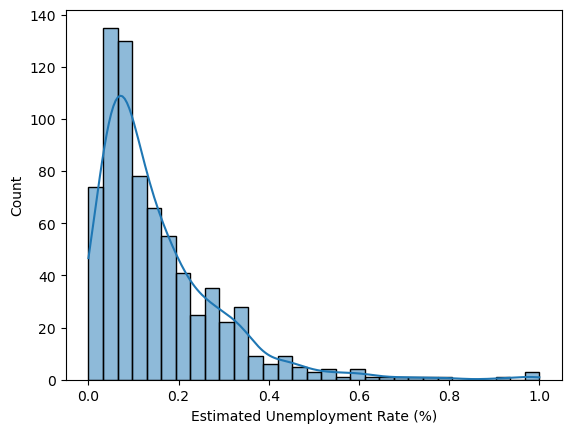

In [25]:
sns.histplot(data['Estimated Unemployment Rate (%)'], kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.show()

In [28]:
data = pd.get_dummies(data, columns=['Region', 'Area'], drop_first=True)
from scipy import stats
z_scores = stats.zscore(data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
data = data[(z_scores < 3).all(axis=1)]

data.fillna(data.mean(), inplace=True)

C:\Users\DIYANN\AppData\Local\Temp\ipykernel_5720\1603812988.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
C:\Users\DIYANN\AppData\Local\Temp\ipykernel_5720\1603812988.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [29]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 753
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     699 non-null    datetime64[ns]
 1   Frequency                                699 non-null    category      
 2   Estimated Unemployment Rate (%)          699 non-null    float64       
 3   Estimated Employed                       699 non-null    float64       
 4   Estimated Labour Participation Rate (%)  699 non-null    float64       
 5   Region_Assam                             699 non-null    uint8         
 6   Region_Bihar                             699 non-null    uint8         
 7   Region_Chandigarh                        699 non-null    uint8         
 8   Region_Chhattisgarh                      699 non-null    uint8         
 9   Region_Delhi                             69

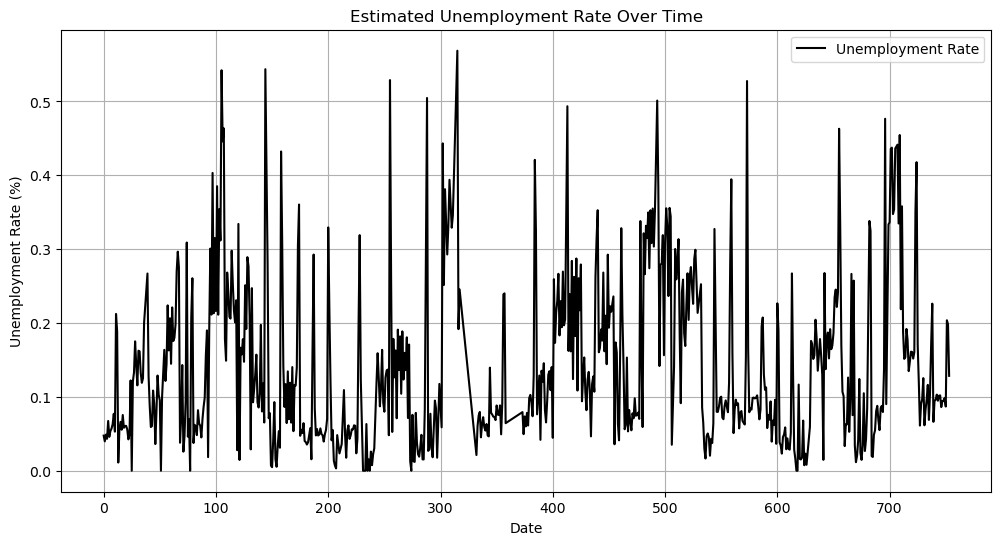

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Estimated Unemployment Rate (%)'], label='Unemployment Rate',color = 'Black')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
data = data.drop(columns=['Frequency','Date' ])
data.columns

Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Region_Assam',
       'Region_Bihar', 'Region_Chandigarh', 'Region_Chhattisgarh',
       'Region_Delhi', 'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal', 'Area_Urban'],
      dtype='object')

In [32]:
X = data.drop(columns=['Estimated Unemployment Rate (%)'])
y = data['Estimated Unemployment Rate (%)']

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
print(X)

     Estimated Employed  Estimated Labour Participation Rate (%)  \
0              0.261321                                 0.504895   
1              0.256002                                 0.484808   
2              0.263236                                 0.509284   
3              0.267588                                 0.517218   
4              0.266955                                 0.529203   
..                  ...                                      ...   
749            0.236654                                 0.519244   
750            0.235231                                 0.506583   
751            0.202284                                 0.470459   
752            0.201003                                 0.461512   
753            0.197680                                 0.409183   

     Region_Assam  Region_Bihar  Region_Chandigarh  Region_Chhattisgarh  \
0               0             0                  0                    0   
1               0             0  

In [40]:
print(y)

0      0.047563
1      0.039745
2      0.048866
3      0.043263
4      0.067370
         ...   
749    0.098384
750    0.086917
751    0.203675
752    0.198332
753    0.128486
Name: Estimated Unemployment Rate (%), Length: 699, dtype: float64


In [33]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (489, 30) (489,)
Validation set shape: (105, 30) (105,)
Testing set shape: (105, 30) (105,)


In [34]:
from sklearn.ensemble import RandomForestRegressor  # Replace with your chosen model

model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)

     

Mean Absolute Error (MAE) on Validation Data: 0.037044528835772014
R-squared (R²) on Validation Data: 0.6025546081943849


In [44]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)  

# Train the model on the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [45]:
# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.04466426491551633
R-squared (R²) on Validation Data: 0.5105391607191403


In [46]:
model = SVR(kernel='linear')
# Train the model on the training data
model.fit(X_train, y_train)

SVR(kernel='linear')

In [47]:
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)



Mean Absolute Error (MAE) on Validation Data: 0.040721297640765985
R-squared (R²) on Validation Data: 0.5089179702946028


In [48]:
# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.040721297640765985
R-squared (R²) on Validation Data: 0.5089179702946028


# THANK YOU!!!!